<center> <h2> DS 3000 - Spring 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> House Price Prediction</h3> </center>
<center><h4>Stella Ikpatt, Xuyang Li, Martina Radoslavov, Julia Schneider Valois Pires</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
The topic of this project is examining the relationship between the different features of a house and its price. The mission was to find the features that showed the most correlation with the price of the house and use them to in a machine learning algorithm to predict the price of a house based on the given features.

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* Has there been previous work on your topic? Do some research into your topic. Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
The price of the house is independent from the size of the house.
Houses in better condition are more expensive than those in worse condition.
The price of the house is independent from the neighborhood

We were most curious about these particular features listed in the hypotheses. These features were found to have strong correlation. 

* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms in predicting your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables.

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a separate script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset and variables. What do variables represent?


### 2.2. Variables
* For your hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?


### 2.3. Data Analysis
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables?
* Describe whether this is a supervised or unsupervised learning problem. Also identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? Why?

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to extract your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [1]:
#requiring libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [5]:
#Explore all featuers we have for testing, we know that the extra column in training set is the price
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We could see from the above output all the features we have. There are several steps for cleaning the dataset and prepare them for analysis. The first thing is to deal with null values. Missing data might lead to reduction of sample size, or it could be hiding a bias.

In [6]:
#count missing data
number_missing = train.isnull().sum().sort_values(ascending=False)
percent_missing = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
null_summary = pd.concat([number_missing, percent_missing], axis=1, keys=['Number', 'Percent'])
null_summary = null_summary[null_summary['Number'] != 0]
null_summary

Number   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageCond        81  0.055479
GarageType        81  0.055479
GarageYrBlt       81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
BsmtExposure      38  0.026027
BsmtFinType2      38  0.026027
BsmtFinType1      37  0.025342
BsmtCond          37  0.025342
BsmtQual          37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685

We can see from the above output that there are 19 features where some rows is missing the feature. No null value was presented in other features.

Seeing the percent column, which gives us how many percent of rows in the training dataset is missing that value, we could see that for features such as PoolQC or MiscFeature, there are more than 95% houses missing these features. If we choose to drop rows missing these data, we will be dropping a lot of rows and have minimal data left to deal with. Therefore, we will be dropping the features (columns) which are missing in more than 15% of the rows to ensure that we still have a large enough dataset.

We could observe that the 5 features related to Garage have the same number of rows missing them. Recall that there is a 'GarageCars' feature in the dataset; these features are describing different aspects of the garage, therefore we could only keep the one that is not missed by too many rows. The same philosophy applies to features related to Bsmy and MasVnr.

We could notice that there is only 1 row missing Electrical, therefore we could just drop that row.

We will also drop the id column, since the enumerated id is not going to influence the price of the house.

In [7]:
train = train.drop((null_summary[null_summary['Number'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train = train.drop('Id',1)
train

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
0       Inside       Gtl      CollgCr  ...             0         0   
1          FR2       Gtl      Veenker  ...             0         0   
2       Inside       Gtl      CollgCr  ...             0         0   
3       Corner       Gtl      Crawfor  ...           272         0   
4          FR2       Gtl      NoRidge  ...             0         0   
...        ...       ...          ...  ...           ...       ...   
1455    Inside       Gtl      Gilbert  ...             0         0   
1456    Inside       Gtl       NWAmes  ...             0         0   
1457    Inside       Gtl      Crawfor  ...             0         0   
1458    Inside       Gtl        NAmes  ...           112         0   
1459    Inside       Gtl      Edwards  ...             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  \
0              0        0        0       2    2008        WD        Normal   
1              0        0        0       5    2007        WD        Normal   
2              0        0        0       9    2008        WD        Normal   
3              0        0        0       2    2006        WD       Abnorml   
4              0        0        0      12    2008        WD        Normal   
...          ...      ...      ...     ...     ...       ...           ...   
1455           0        0        0       8    2007        WD        Normal   
1456           0        0        0       2    2010        WD        Normal   
1457           0        0     2500       5    2010        WD        Normal   
1458           0        0        0       4    2010        WD        Normal   
1459           0        0        0       6    2008        WD        Normal   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1459 rows x 62 columns]

In [8]:
#confirm that there is no null values left
train.isnull().sum().max()

0

In [9]:
#remaining features
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

We are done dealing with null data. Next we need to deal with non-numerical features. We will first see what categories are there, and then convert them into discrete numerical values

In [10]:
#find all columns that are not numeric
non_numeric_cols = train.select_dtypes(exclude=['number'])
non_numeric_cols.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
#find number of unique values in each column
non_numeric_cols.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [12]:
#transforming the dataframe
columns = list(non_numeric_cols)
columns
for i in columns:
    unique_values = non_numeric_cols[i].unique()
    convert_dict = {unique_values[j] : j for j in range(0, len(unique_values))}
    train[i] = train[i].apply(lambda x: convert_dict[x])
train.head(50)

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0           60         0     8450       0         0            0          0   
1           20         0     9600       0         0            0          0   
2           60         0    11250       0         1            0          0   
3           70         0     9550       0         1            0          0   
4           60         0    14260       0         1            0          0   
5           50         0    14115       0         1            0          0   
6           20         0    10084       0         0            0          0   
7           60         0    10382       0         1            0          0   
8           50         1     6120       0         0            0          0   
9          190         0     7420       0         0            0          0   
10          20         0    11200       0         0            0          0   
11          60         0    11924       0         1            0          0   
12          20         0    12968       0         2            0          0   
13          20         0    10652       0         1            0          0   
14          20         0    10920       0         1            0          0   
15          45         1     6120       0         0            0          0   
16          20         0    11241       0         1            0          0   
17          90         0    10791       0         0            0          0   
18          20         0    13695       0         0            0          0   
19          20         0     7560       0         0            0          0   
20          60         0    14215       0         1            0          0   
21          45         1     7449       0         0            1          0   
22          20         0     9742       0         0            0          0   
23         120         1     4224       0         0            0          0   
24          20         0     8246       0         1            0          0   
25          20         0    14230       0         0            0          0   
26          20         0     7200       0         0            0          0   
27          20         0    11478       0         0            0          0   
28          20         0    16321       0         1            0          0   
29          30         1     6324       0         1            0          0   
30          70         2     8500       0         0            0          0   
31          20         0     8544       0         1            0          0   
32          20         0    11049       0         0            0          0   
33          20         0    10552       0         1            0          0   
34         120         0     7313       0         0            0          0   
35          60         0    13418       0         0            0          0   
36          20         0    10859       0         0            0          0   
37          20         0     8532       0         0            0          0   
38          20         0     7922       0         0            0          0   
39          90         0     6040       0         0            0          0   
40          20         0     8658       0         0            0          0   
41          20         0    16905       0         0            0          0   
42          85         0     9180       0         1            0          0   
43          20         0     9200       0         1            0          0   
44          20         0     7945       0         0            0          0   
45         120         0     7658       0         0            0          0   
46          50         0    12822       0         1            0          0   
47          20         3    11096       0         0            0          0   
48         190         1     4456       0         0            0          0   
49          20         0     7742       0         0   

### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and link those in Jupyter Notebook)


We will first examine 

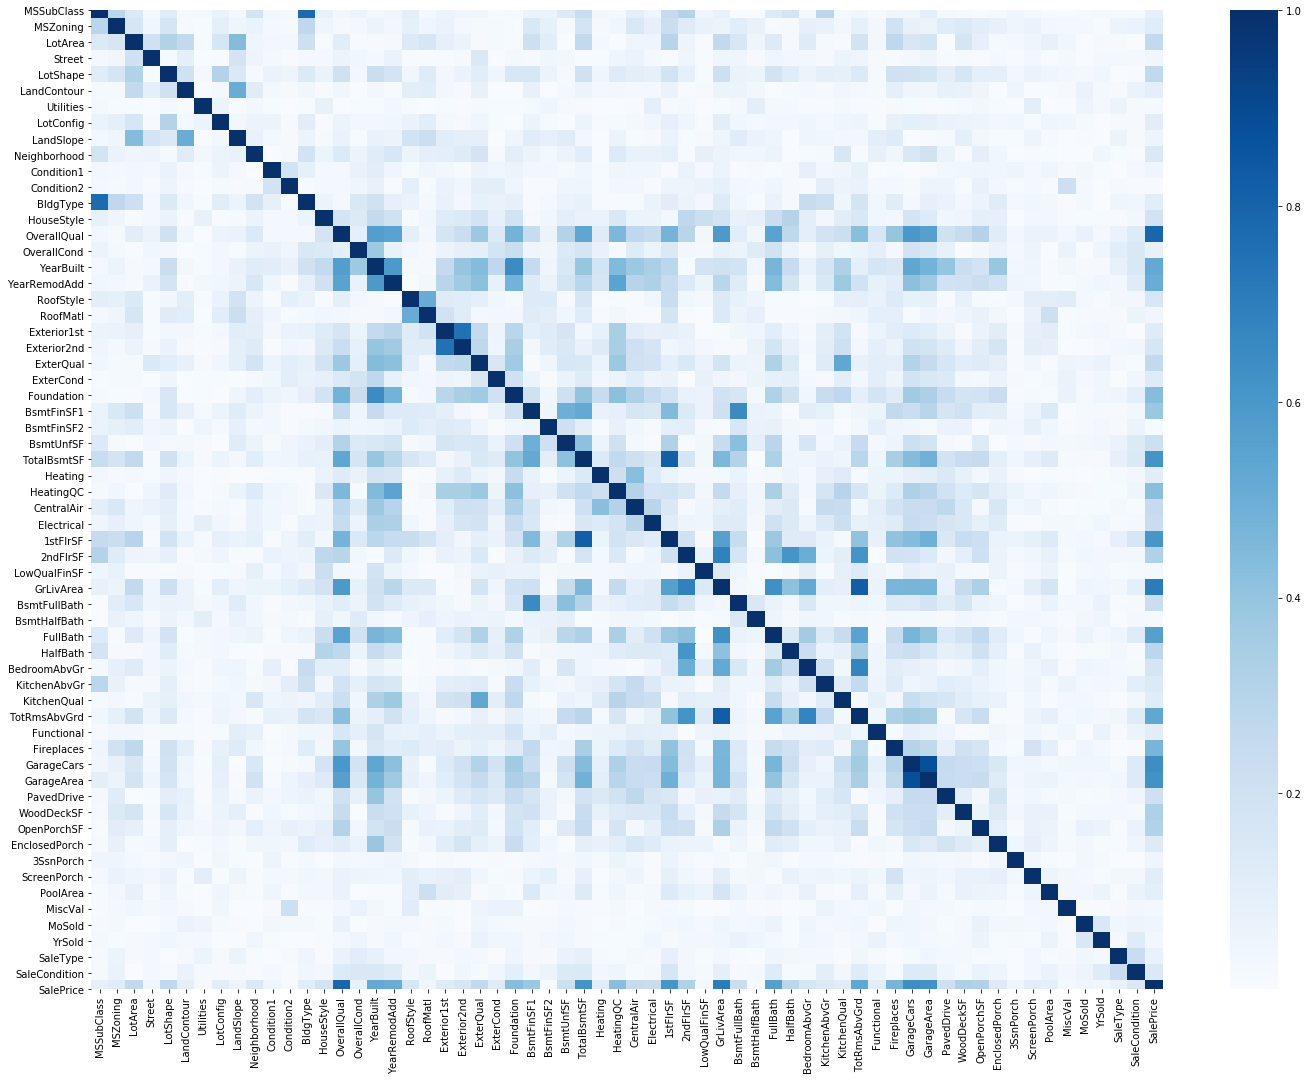

In [13]:
cor_matrix = train.corr().abs()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(cor_matrix, cmap="Blues")

From the above heatmap, we could see that there are extremely bright (with high cor coefficient) blocks, such as Garage Cars and Garage Area.
We are most interested in features with some correlation with the price of the house. From the heat map we could observe tgat some features have close to none correlation with the price. These are
Utilities, Condition2, RoofMatl, BsmtFinSF2, LowQualFinSF, BsmtHalfBath, MiscVal, MoSoldPoolArea, 3SsnPornch, YrSold

High corr with price: OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1lrSF, GrLiveArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF

We will zoom into these features

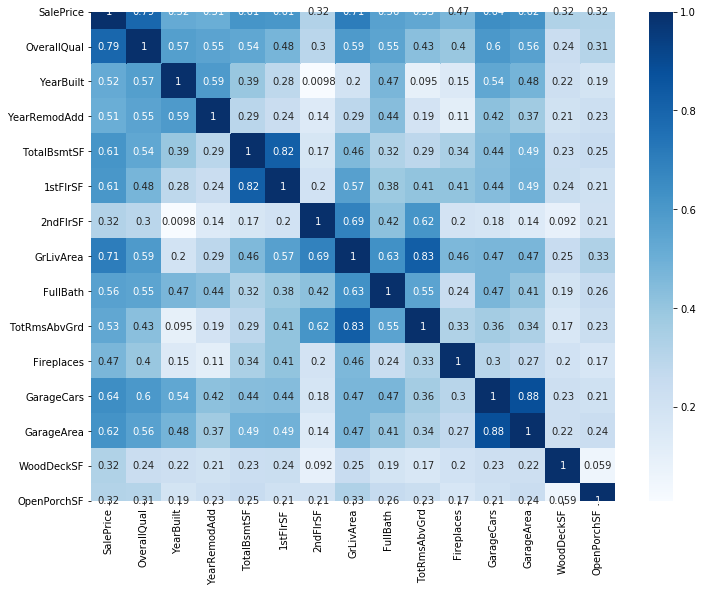

In [14]:
high_corr = train[['SalePrice','OverallQual', 'YearBuilt',
                    'YearRemodAdd','TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'GrLivArea','FullBath',
                    'TotRmsAbvGrd','Fireplaces', 'GarageCars',
                    'GarageArea','WoodDeckSF','OpenPorchSF']]
cor_matrix = high_corr.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cor_matrix, cmap="Blues", annot=True, square=True)

Need to fix graph.
Notice some features are correlated to each other. Observe correlation

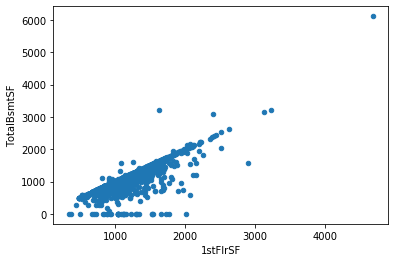

In [15]:
TotaleBsmySF_1stFlrSF = train[['1stFlrSF', 'TotalBsmtSF']]
TotaleBsmySF_1stFlrSF.plot.scatter(x='1stFlrSF', y='TotalBsmtSF')

There is a clear positive correlation, with few outliers. Considering both these features might be redundant.
Now examine some features correlated to the price, say GrLivArea (as we expected).

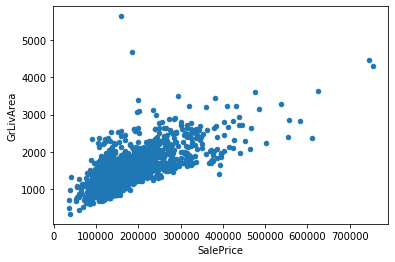

In [16]:
grLivArea_price = train[['SalePrice', 'GrLivArea']]
grLivArea_price.plot.scatter(x='SalePrice', y='GrLivArea')

There is clearly a positive correlation. However, we can see there are two interesting outliers, where the area are the two largest ones but price is very low. This could be caused by the fact that they are too large. We should drop these outliars. To do that we would locate them and drop them.

<IPython.core.display.Javascript object>


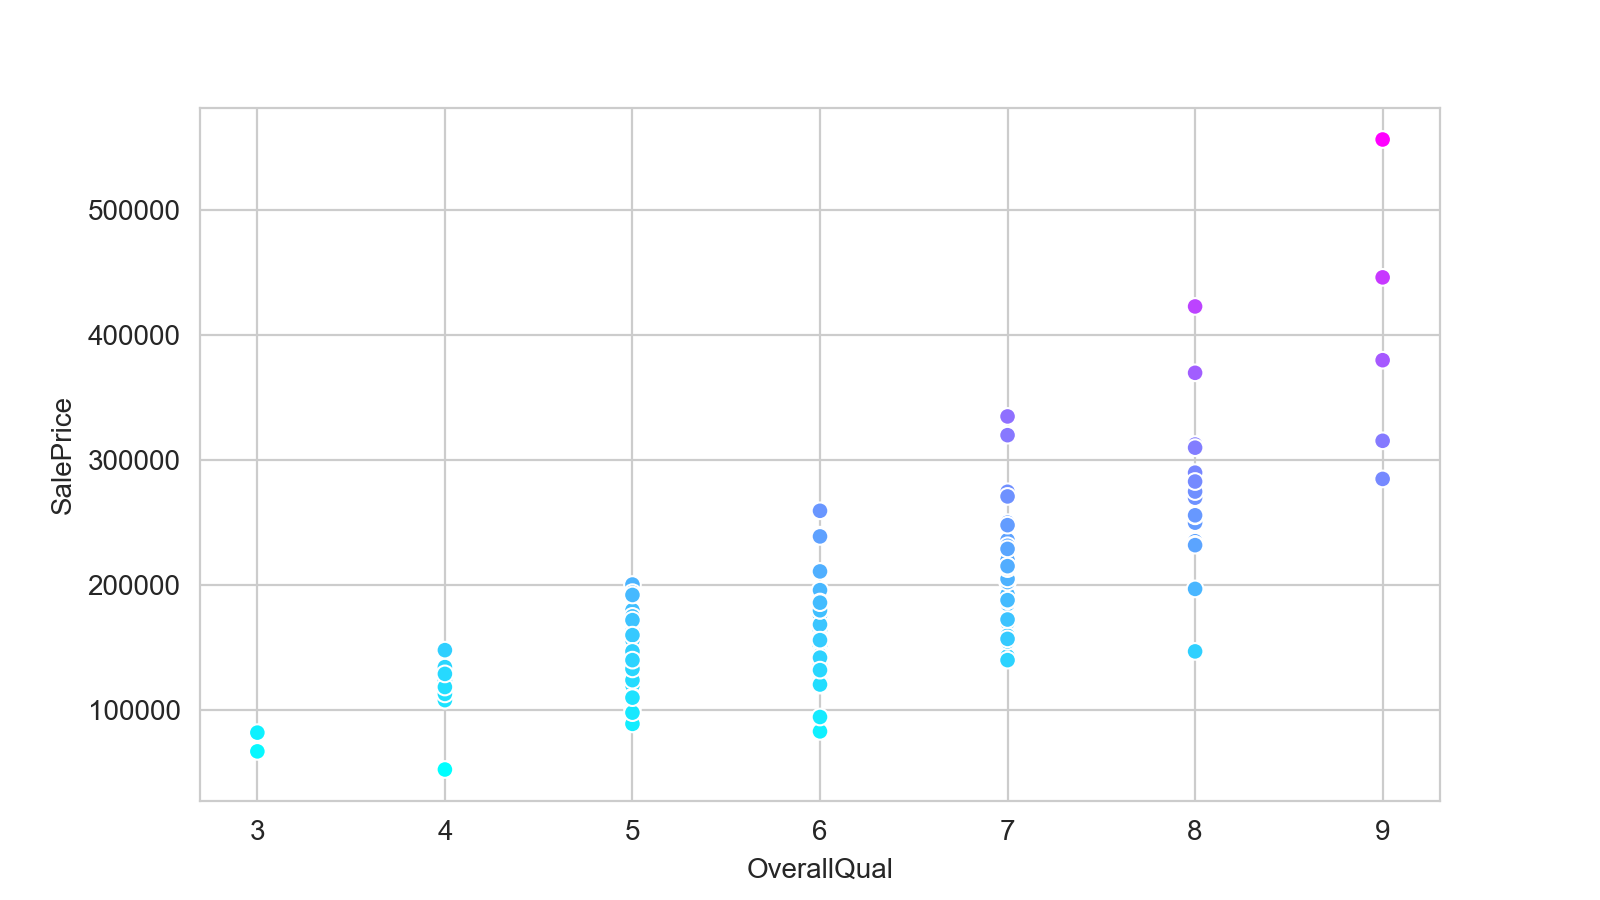

<IPython.core.display.Javascript object>


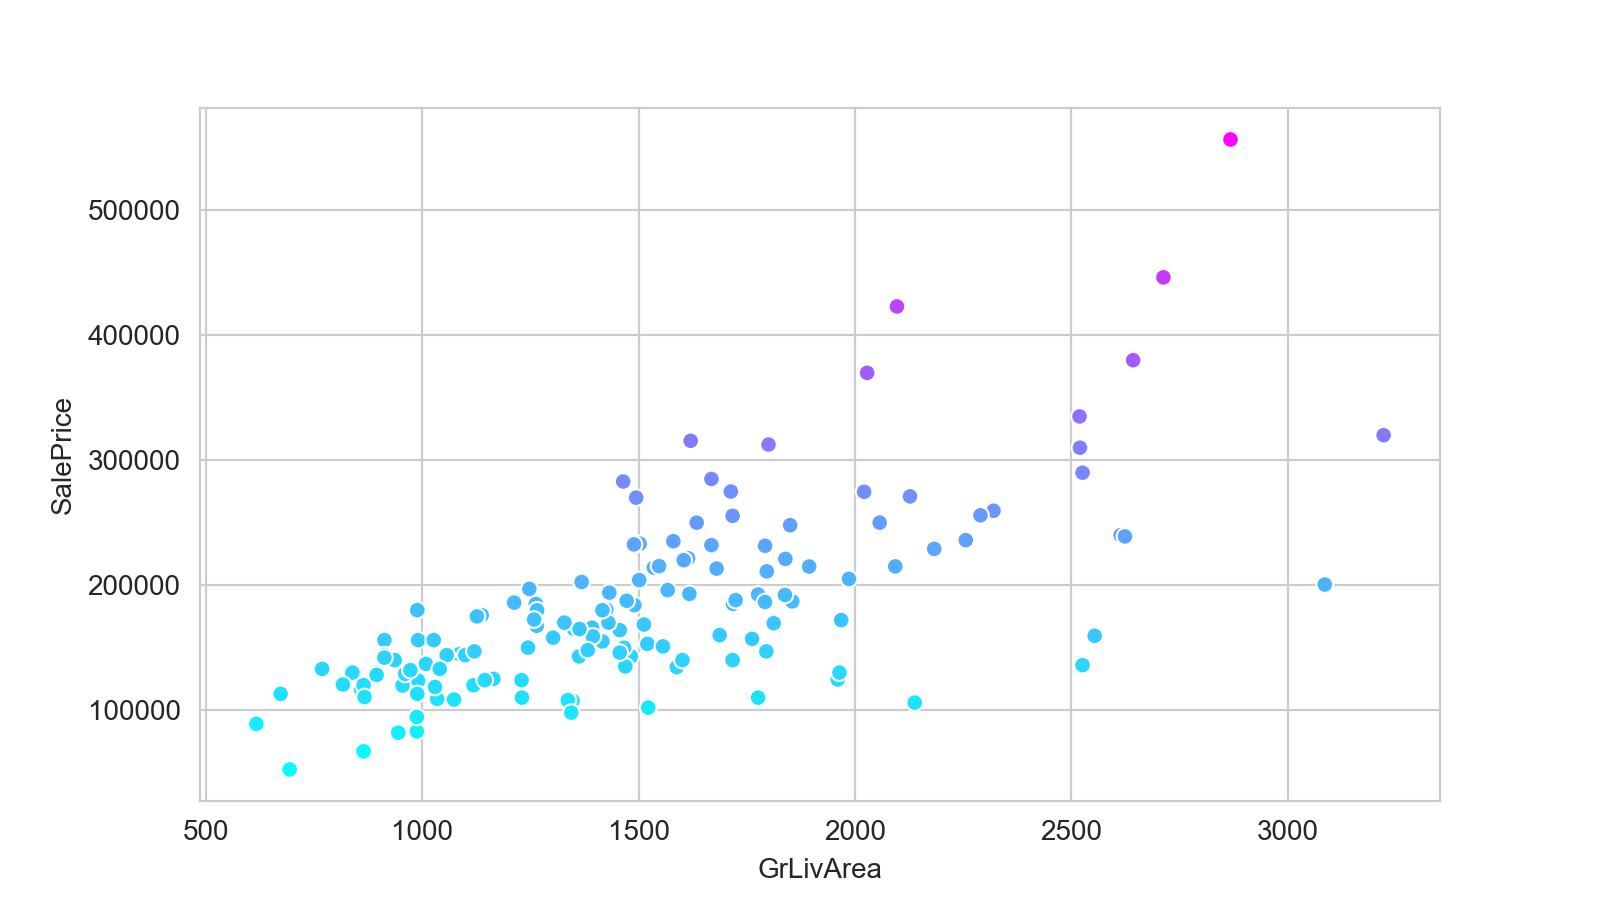

<IPython.core.display.Javascript object>


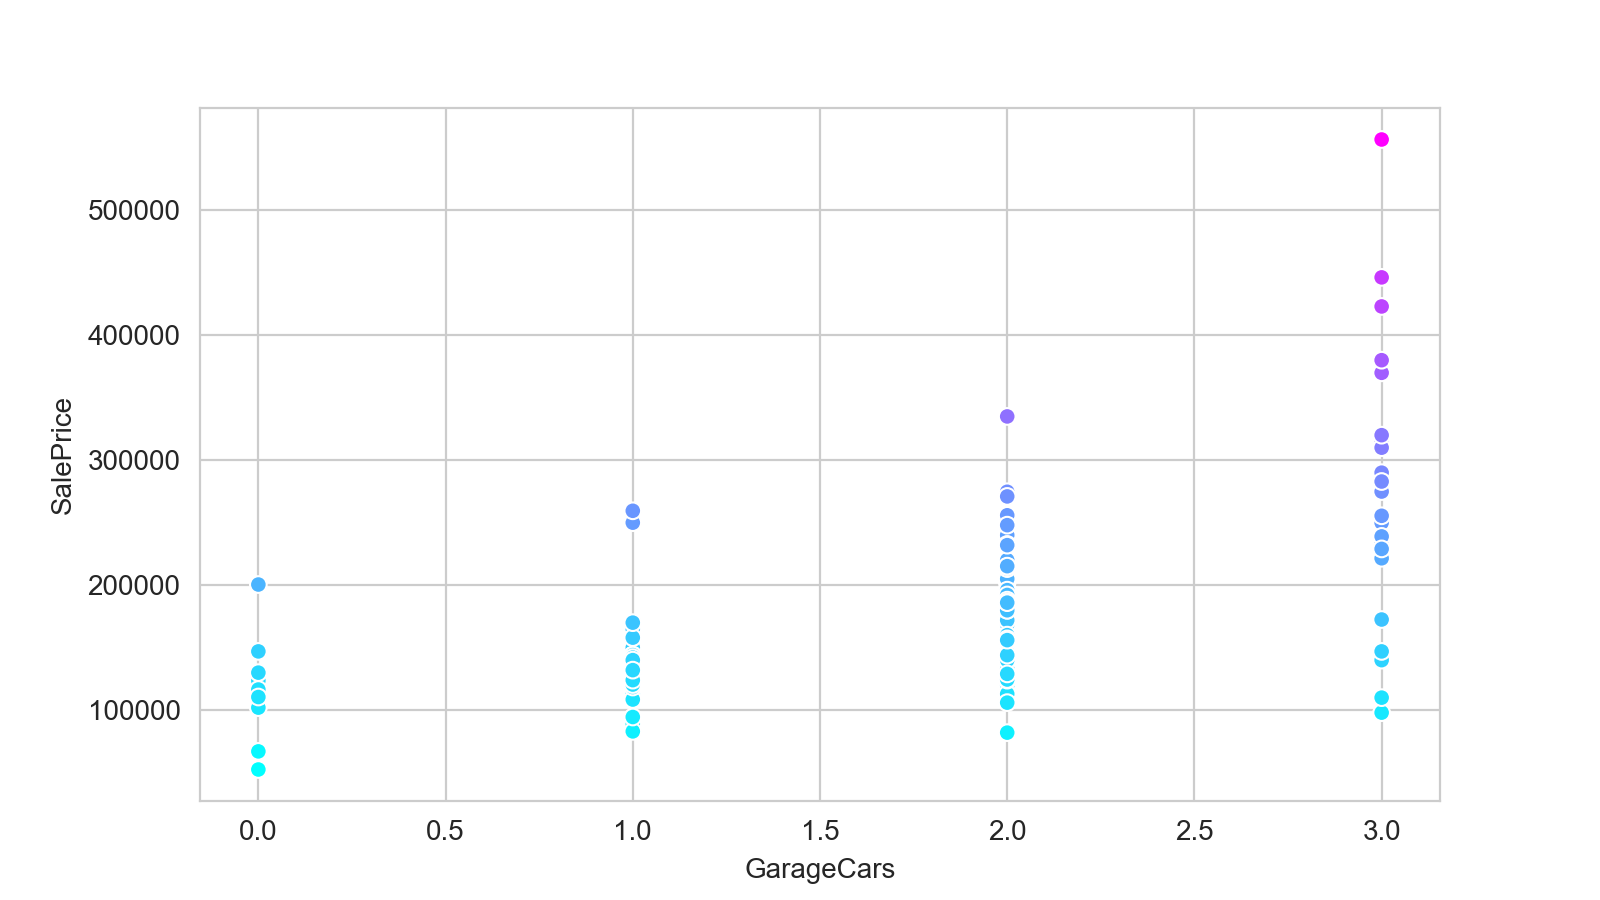

<IPython.core.display.Javascript object>


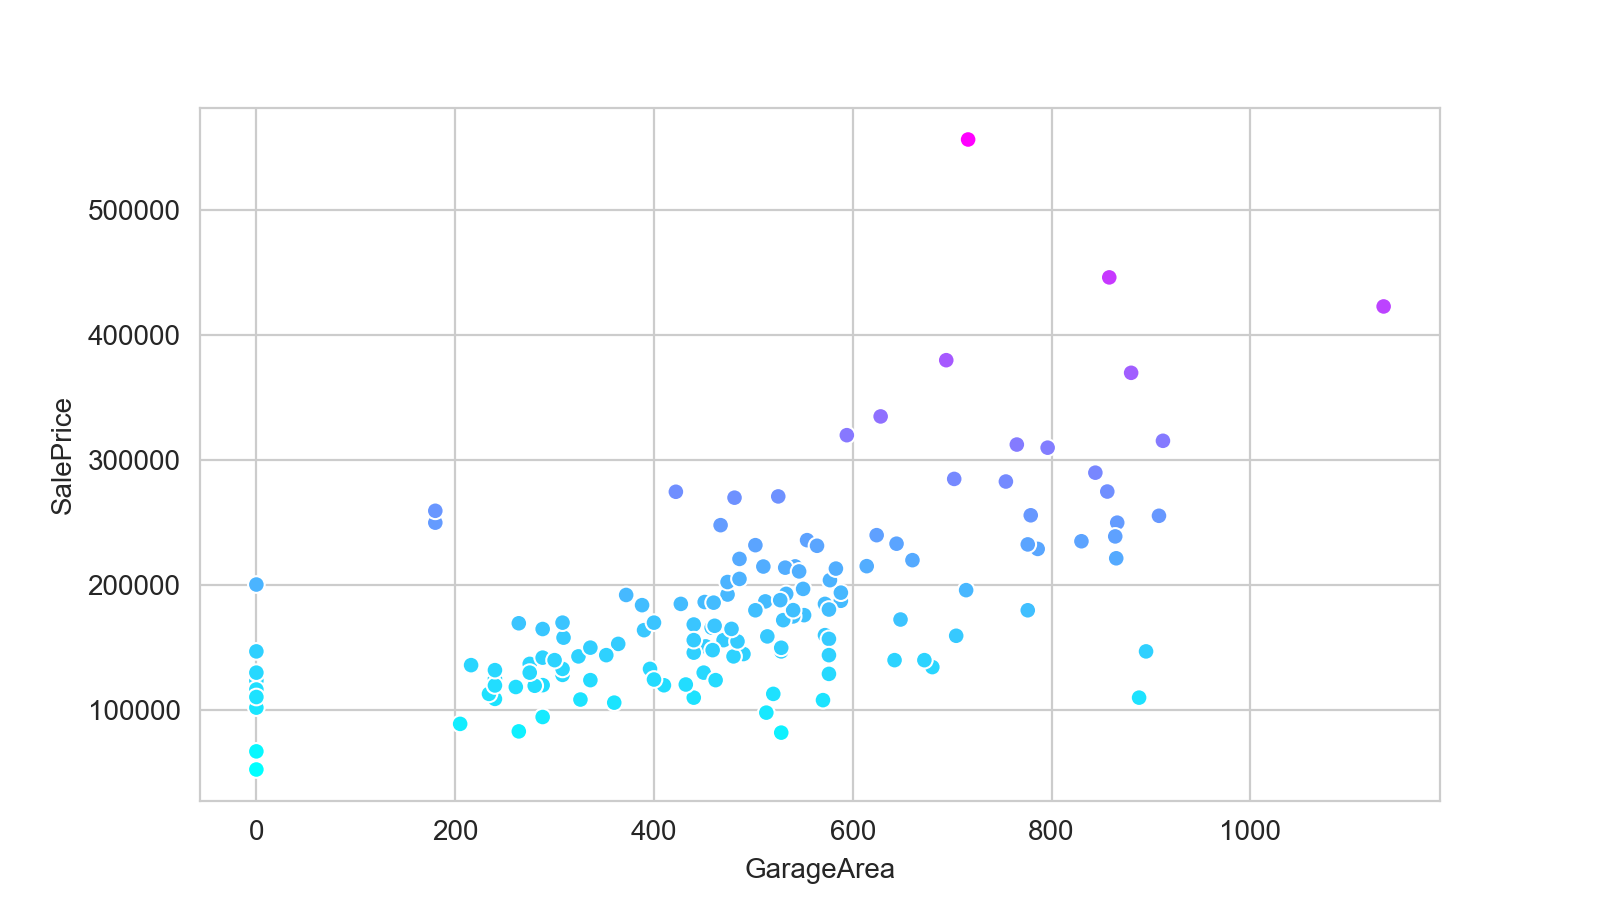

<IPython.core.display.Javascript object>


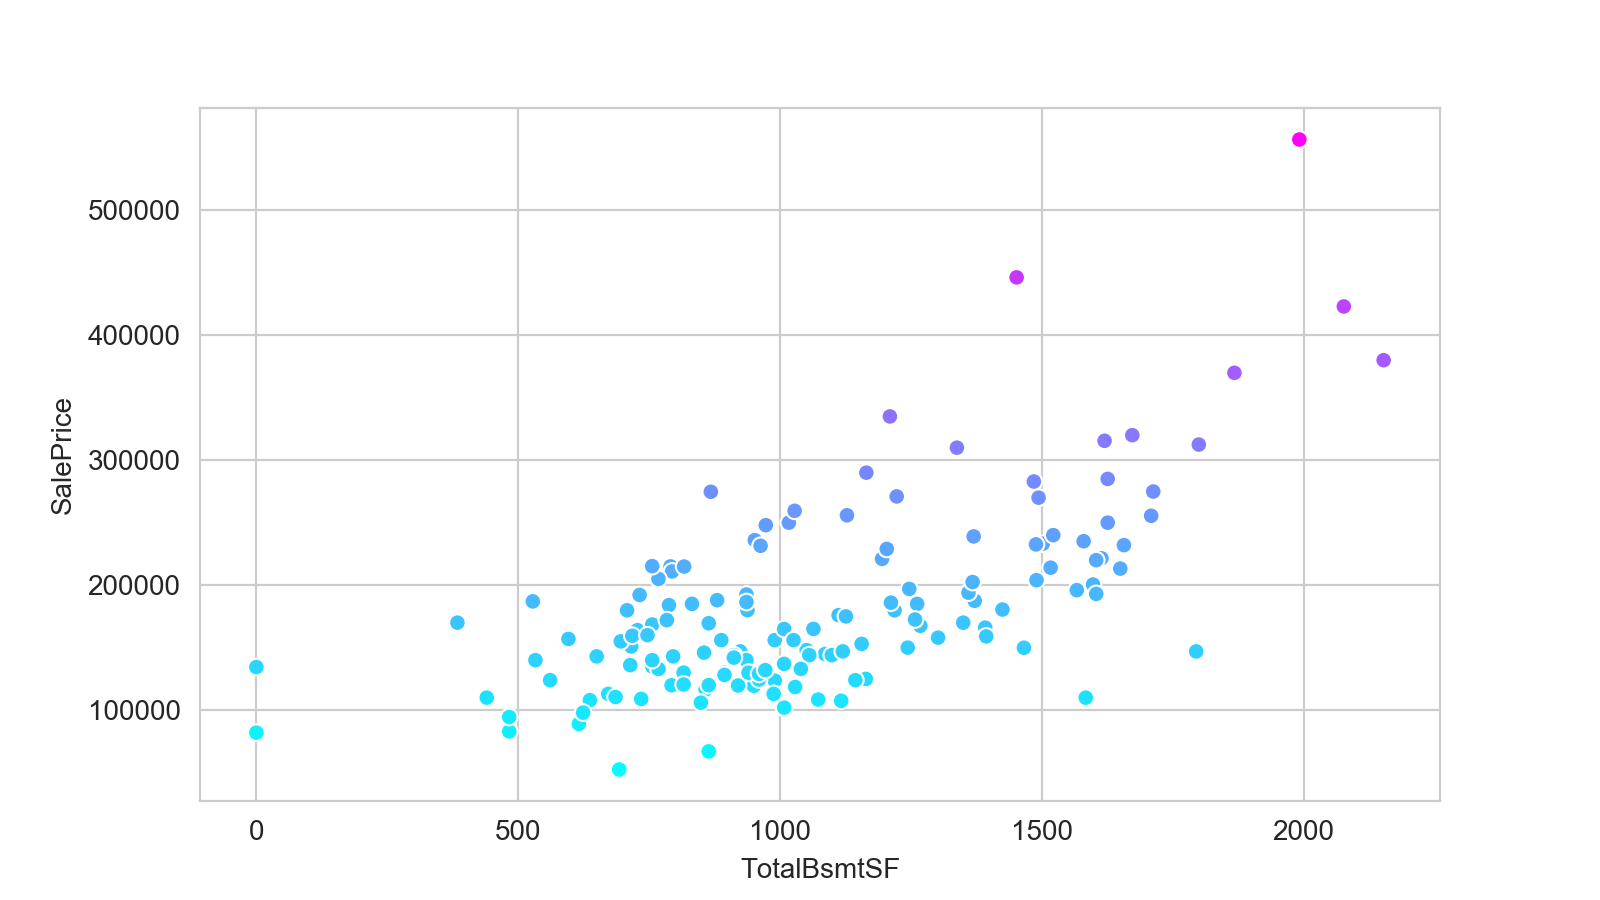

<IPython.core.display.Javascript object>


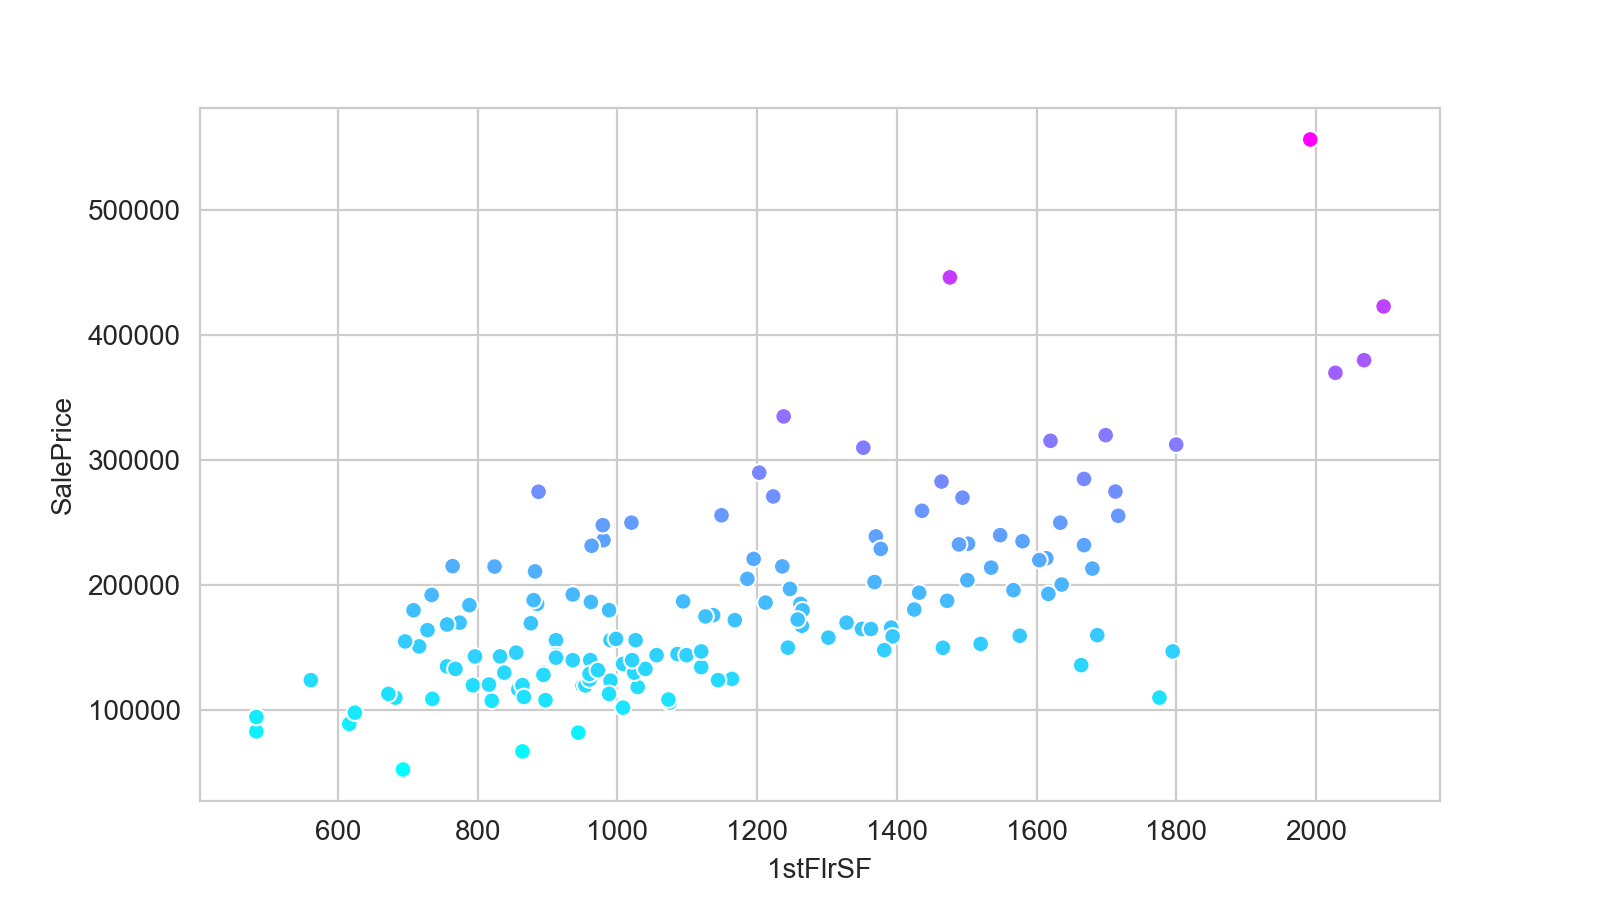

<IPython.core.display.Javascript object>


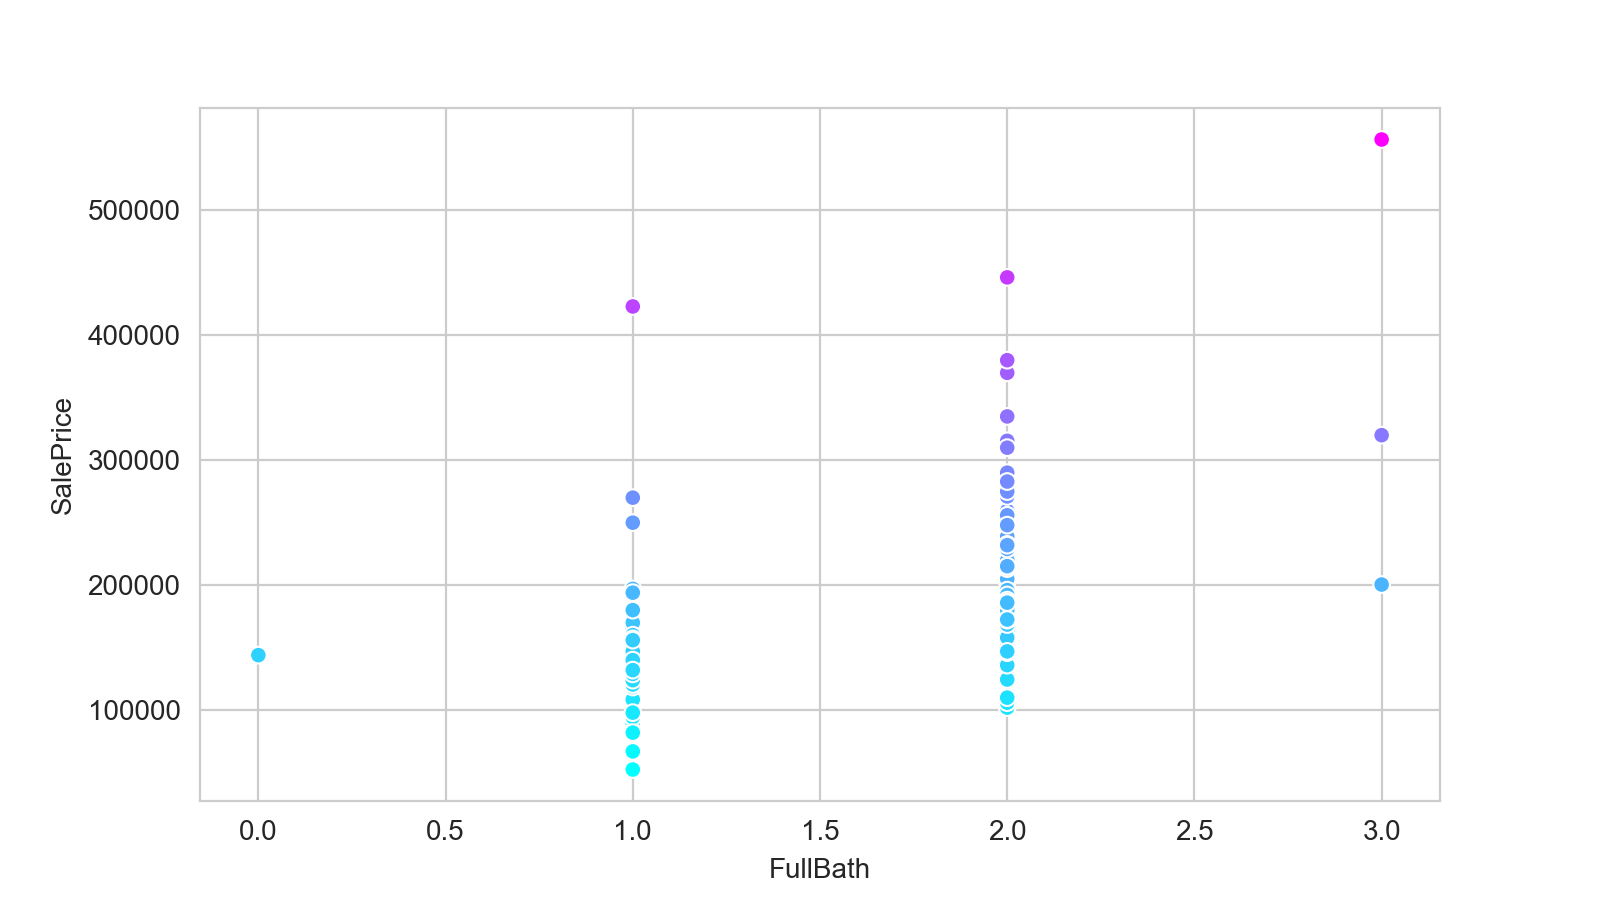

<IPython.core.display.Javascript object>


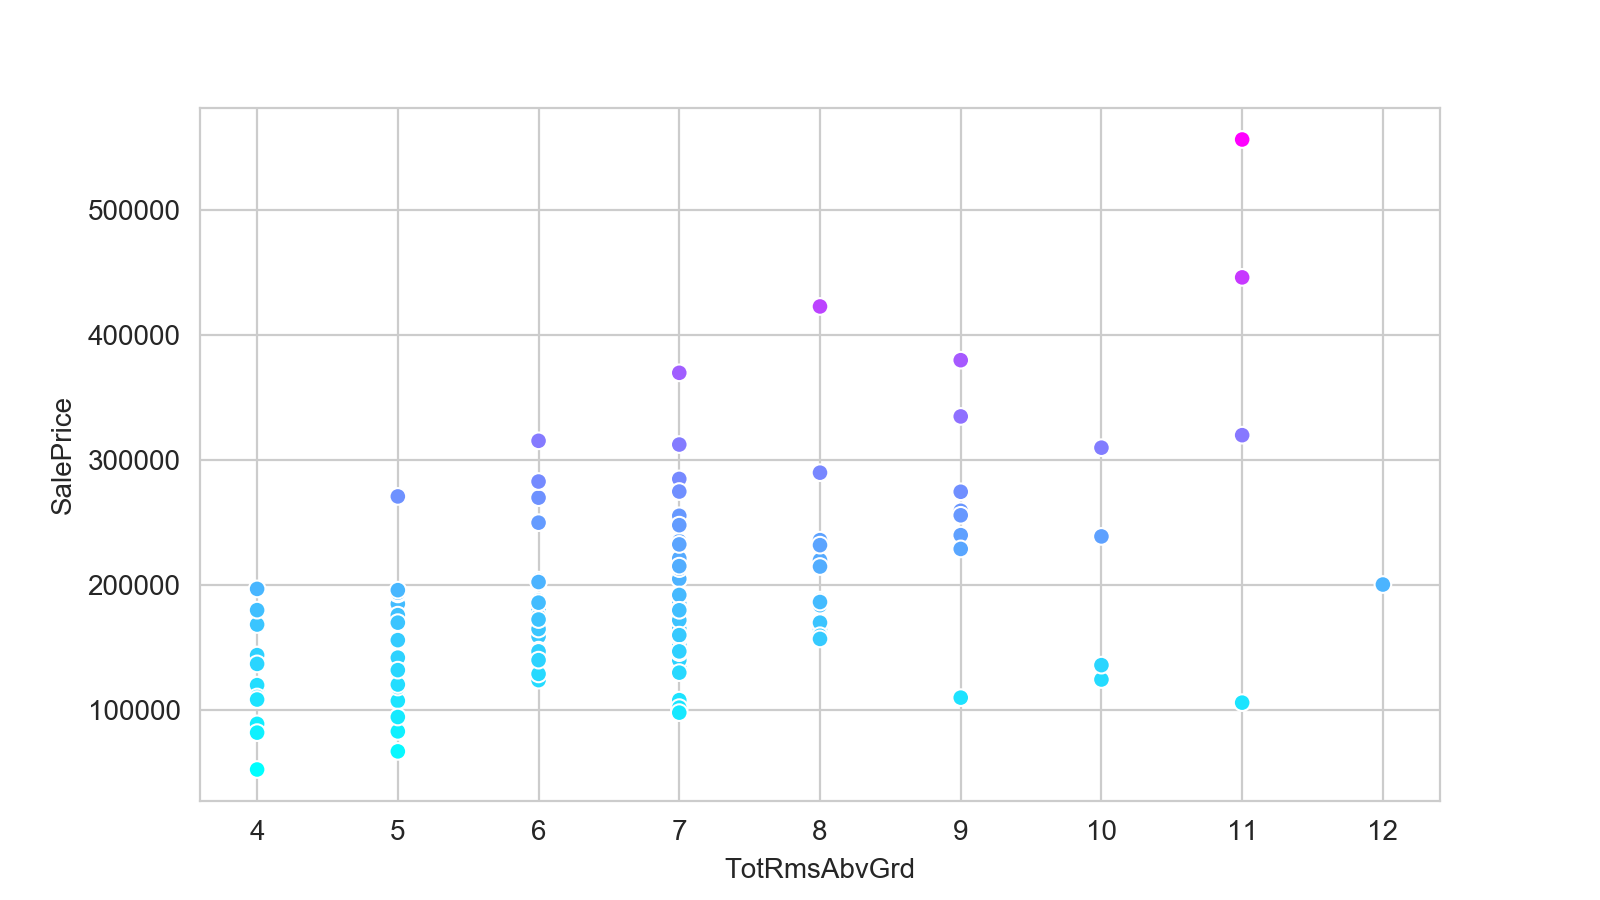

<IPython.core.display.Javascript object>


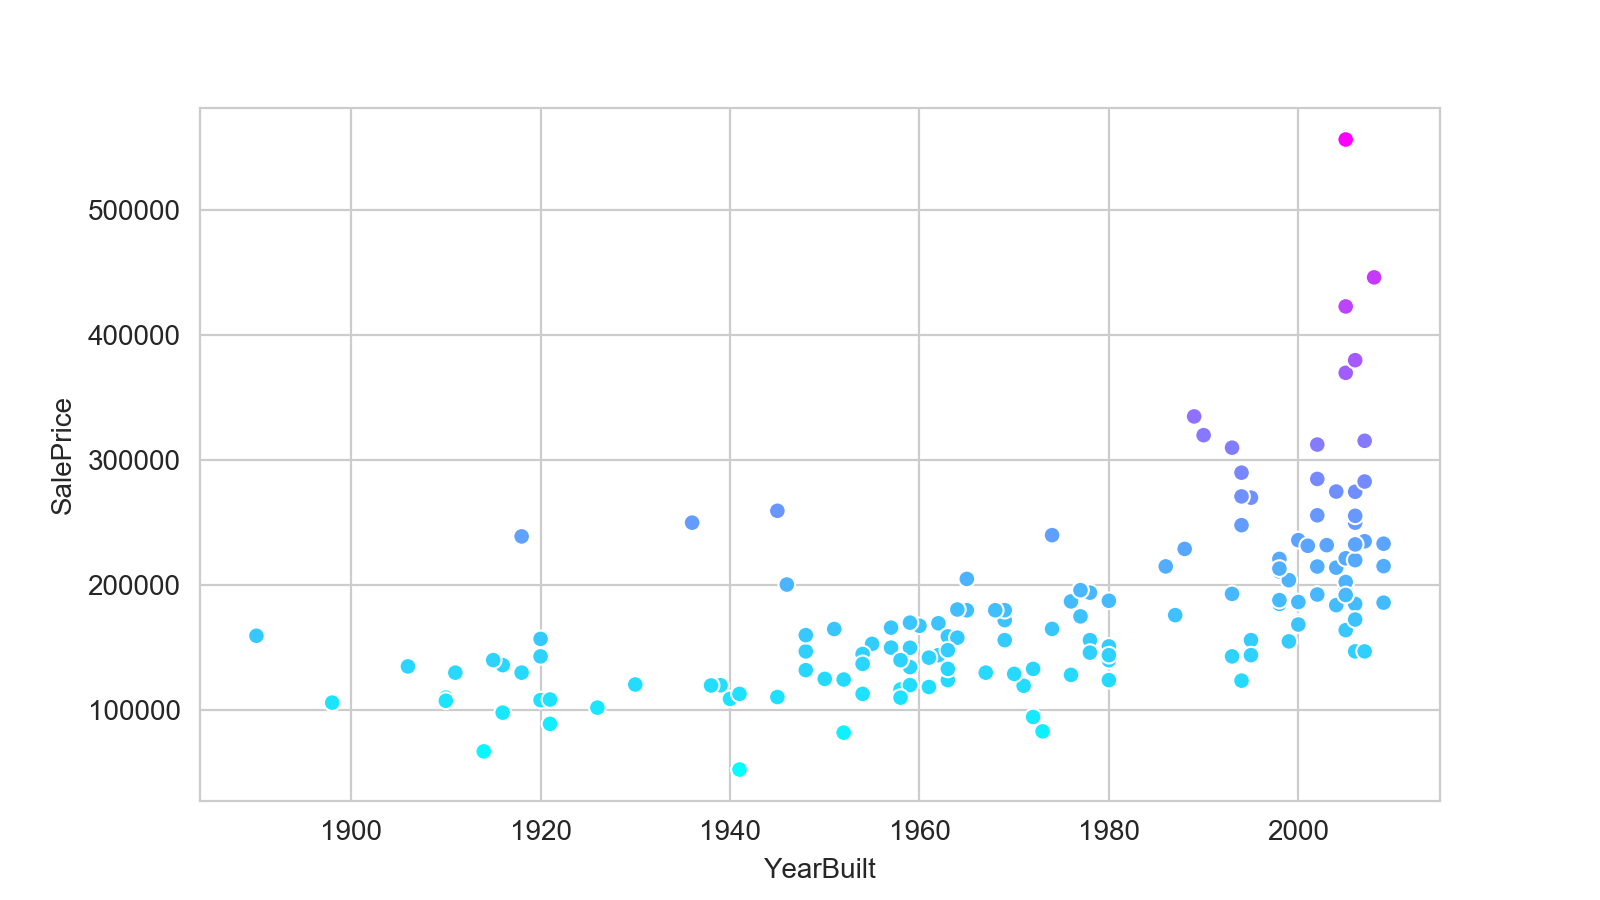

<IPython.core.display.Javascript object>


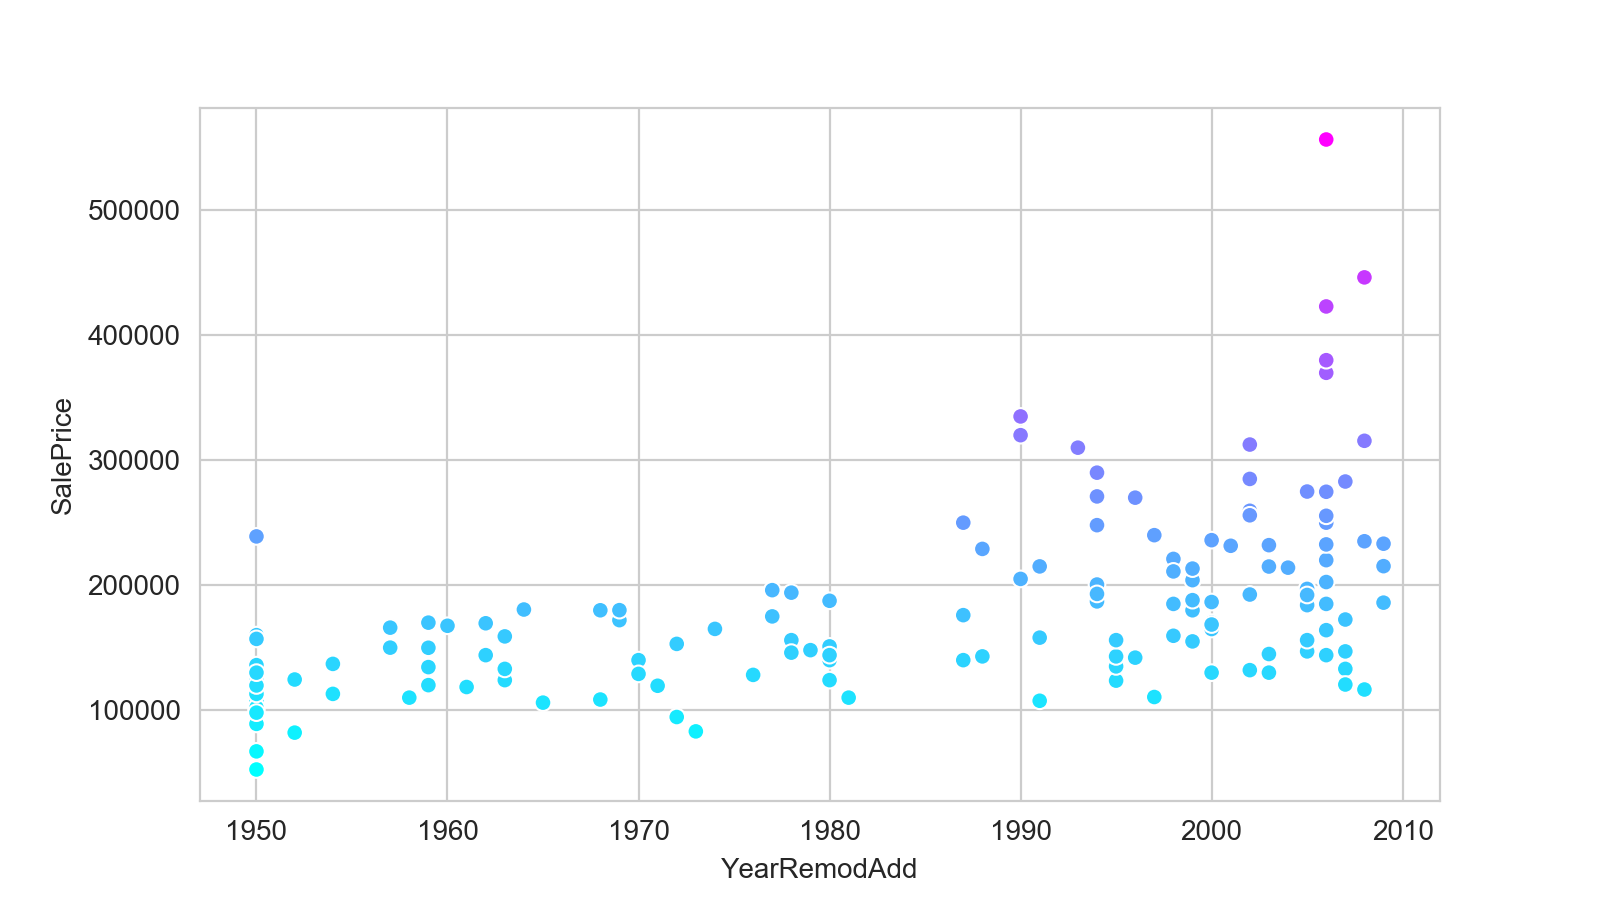

In [20]:
%matplotlib notebook
sample_train = train.sample(frac=0.1, random_state=3000)

sns.set_style('whitegrid')

list = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
        '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

for item in list:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_train, x=item, y='SalePrice', hue='SalePrice', palette='cool', legend=False)

In [21]:
for item in list:
    r, p = stats.pearsonr(train[item], train["SalePrice"])
    print(item, "\ncorrelation coefficient: ", r, "\np-value:", p, "\n")

OverallQual 
correlation coefficient:  0.7910686627656216 
p-value: 2.7328645978e-313 

GrLivArea 
correlation coefficient:  0.7086176136783886 
p-value: 6.497323909816518e-223 

GarageCars 
correlation coefficient:  0.6404729026424085 
p-value: 2.942120337087195e-169 

GarageArea 
correlation coefficient:  0.6234228990077118 
p-value: 6.822250957972721e-158 

TotalBsmtSF 
correlation coefficient:  0.6139049674835603 
p-value: 7.540001293905206e-152 

1stFlrSF 
correlation coefficient:  0.6059678567747738 
p-value: 5.771339923300874e-147 

FullBath 
correlation coefficient:  0.5608806241605165 
p-value: 1.1530880838941297e-121 

TotRmsAbvGrd 
correlation coefficient:  0.5337788652255548 
p-value: 3.0862703713022422e-108 

YearBuilt 
correlation coefficient:  0.523273060585643 
p-value: 2.3642480052431843e-103 

YearRemodAdd 
correlation coefficient:  0.5074302189394628 
p-value: 2.645357879378963e-96 



In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

estimators = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(), 
    'Lasso': Lasso(),
    'k-Nearest Neighbor': KNeighborsRegressor(n_neighbors = 5),
    'Support Vector Machine' : LinearSVR(max_iter = 100000000)}

In [26]:
import plotly.express as px
import plotly.graph_objects as go

for estimator_name, estimator_object in estimators.items():
    model = estimator_object.fit(X=X_train, y=y_train)
    predicted = model.predict(X_test)
    expected = y_test
    results_df = pd.DataFrame(expected.values, columns=["expected"])
    results_df["predicted"] = predicted
    
    #produce the scatter plot
    graph = px.scatter(results_df, x="expected", y="predicted", template="none", color="predicted", opacity=.7)

    #add the "perfect prediction" line; this is not the regression line
    graph.update_layout(
    
        shapes=[    
            go.layout.Shape(
                type="line",
                x0=0, y0=0,
                x1=400000, y1=400000,
                line=dict(color="coral", width=2, dash="dash")
            )
        ]
    )

    #need to change axes limits; otherwise, plotly will auto-scale, leading to confusion
    graph.update_layout(xaxis = dict(range = [0, 400000]))
    graph.update_layout(yaxis = dict(range = [0, 400000]))

    graph.show()

In [22]:
import plotly.express as plt
# What are the average prices of houses in different neighborhoods?
tbl = pd.read_csv("train.csv")
descriptives = tbl.groupby('Neighborhood')['SalePrice'].agg(['count', 'mean', 'std', 'sem'])
descriptives.reset_index(inplace=True)

graph = plt.bar(descriptives, x = "Neighborhood", y = "mean", error_x = "sem", error_y = "sem", template='none', width=500, 
                labels = {"mean": "SalePrice", "Group": "Neighborhood"})
graph

In [33]:
descriptives.sort_values(by=["count"], ascending=False)

Neighborhood  count           mean            std           sem
12        NAmes    225  145847.080000   33075.345450   2205.023030
5       CollgCr    150  197965.773333   51403.666438   4197.091789
17      OldTown    113  128225.300885   52650.583185   4952.950233
7       Edwards    100  128219.700000   43208.616459   4320.861646
21      Somerst     86  225379.837209   56177.555888   6057.781643
8       Gilbert     79  192854.506329   35986.779085   4048.828974
16      NridgHt     77  316270.623377   96392.544954  10984.949989
19       Sawyer     74  136793.135135   22345.129157   2597.568502
14       NWAmes     73  189050.068493   37172.218106   4350.679051
20      SawyerW     59  186555.796610   55651.997820   7245.272990
3       BrkSide     58  124834.051724   40348.689270   5298.042459
6       Crawfor     51  210624.725490   68866.395472   9643.224204
11      Mitchel     49  156270.122449   36486.625334   5212.375048
15      NoRidge     41  335295.317073  121412.658640  18961.471641
23       Timber     38  242247.447368   64845.651549  10519.353748
9        IDOTRR     37  100123.783784   33376.710117   5487.097343
4       ClearCr     28  212565.428571   50231.538993   9492.868582
22      StoneBr     25  310499.000000  112969.676640  22593.935328
18        SWISU     25  142591.360000   32622.917679   6524.583536
0       Blmngtn     17  194870.882353   30393.229219   7371.440846
10      MeadowV     17   98576.470588   23491.049610   5697.416400
2        BrDale     16  104493.750000   14330.176493   3582.544123
24      Veenker     11  238772.727273   72369.317959  21820.170364
13      NPkVill      9  142694.444444    9377.314529   3125.771510
1       Blueste      2  137500.000000   19091.883092  13500.000000

In [35]:
NAmes = tbl[tbl['Neighborhood'] == "NAmes"]['SalePrice']
NAmes

14      157000
16      149000
19      139000
26      134800
28      207500
         ...  
1427    140000
1435    174000
1436    120500
1450    136000
1458    142125
Name: SalePrice, Length: 225, dtype: int64

In [36]:
CollgCr = tbl[tbl['Neighborhood'] == "CollgCr"]['SalePrice']
OldTown = tbl[tbl['Neighborhood'] == "OldTown"]['SalePrice']
Edwards = tbl[tbl['Neighborhood'] == "Edwards"]['SalePrice']
Somerst = tbl[tbl['Neighborhood'] == "Somerst"]['SalePrice']
Gilbert = tbl[tbl['Neighborhood'] == "Gilbert"]['SalePrice']
NridgHt = tbl[tbl['Neighborhood'] == "NridgHt"]['SalePrice']
Sawyer = tbl[tbl['Neighborhood'] == "Sawyer"]['SalePrice']
NWAmes = tbl[tbl['Neighborhood'] == "NWAmes"]['SalePrice']
SawyerW = tbl[tbl['Neighborhood'] == "SawyerW"]['SalePrice']
BrkSide = tbl[tbl['Neighborhood'] == "BrkSide"]['SalePrice']
Crawfor = tbl[tbl['Neighborhood'] == "Crawfor"]['SalePrice']

In [38]:
results = stats.f_oneway(CollgCr, OldTown, Edwards, Somerst, Gilbert, NridgHt, Sawyer, NWAmes, SawyerW, BrkSide, Crawfor)
results

F_onewayResult(statistic=90.50899348176782, pvalue=4.594865147467479e-129)

In [43]:
#t value
fstatistic = results[0]
#p value in scientific notation
pvalue = results[1]
format(pvalue, '.10f')

print("t-value: ", fstatistic, "p-value: ", pvalue)

t-value:  90.50899348176782 p-value:  4.594865147467479e-129


In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [47]:
mc = MultiComparison(tbl['SalePrice'], tbl['Neighborhood'])

tukey_result = mc.tukeyhsd()
 
print(tukey_result)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1  group2   meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------
Blmngtn Blueste  -57370.8824    0.9 -205327.1494   90585.3847  False
Blmngtn  BrDale  -90377.1324  0.001 -159316.6978  -21437.5669   True
Blmngtn BrkSide  -70036.8306  0.001 -124623.7013    -15449.96   True
Blmngtn ClearCr   17694.5462    0.9  -43160.8093   78549.9018  False
Blmngtn CollgCr     3094.891    0.9  -47555.6594   53745.4414  False
Blmngtn Crawfor   15753.8431    0.9   -39675.653   71183.3393  False
Blmngtn Edwards  -66651.1824  0.001 -118574.7463  -14727.6184   True
Blmngtn Gilbert    -2016.376    0.9  -54933.1834   50900.4313  False
Blmngtn  IDOTRR  -94747.0986  0.001  -152739.031  -36755.1661   True
Blmngtn MeadowV  -96294.4118  0.001 -164181.4029  -28407.4206   True
Blmngtn Mitchel  -38600.7599 0.6381  -94312.3419   17110.8221  False
Blmngtn   NAmes  -49023.8024 0.060

### 3.3. Model Construction
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go

features = train.drop("SalePrice", axis=1)
target = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

for estimator_name, estimator_object in estimators.items():
    model = estimator_object.fit(X=X_train, y=y_train)
    print(estimator_name + ":\n\tR-squared value for training set:", r2_score(y_train, model.predict(X_train)), 
              "\n\tR-squared value for testing set: ", r2_score(y_test, model.predict(X_test)), "\n")

Linear Regression:
	R-squared value for training set: 0.8342718097989616 
	R-squared value for testing set:  0.8212051655977133 

Ridge:
	R-squared value for training set: 0.8341673011150036 
	R-squared value for testing set:  0.8214226914072202 

Lasso:
	R-squared value for training set: 0.8342715158518781 
	R-squared value for testing set:  0.8212509677456885 

k-Nearest Neighbor:
	R-squared value for training set: 0.7621011119186738 
	R-squared value for testing set:  0.633888275539481 

Support Vector Machine:
	R-squared value for training set: 0.7214298475128591 
	R-squared value for testing set:  0.7730501565041513 



In [27]:
from sklearn.preprocessing import MinMaxScaler

#create the scaler
scaler = MinMaxScaler()

#fit the scaler to the training data(features only)
scaler.fit(X_train) 

#transform X_train and X_test based on the (same) scaler
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

#train the model using the scaled training data
model = Ridge().fit(X=X_train_scaled, y=y_train)

print("R-squared value for training set: ", r2_score(y_train, model.predict(X_train_scaled)))
print("R-squared value for testing set: ", r2_score(y_test, model.predict(X_test_scaled)))

R-squared value for training set:  0.8325531095411591
R-squared value for testing set:  0.8232418103572421


In [28]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import numpy as np

select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 3)
select.fit(X_train_scaled, y_train)
X_train_selected = select.transform(X_train_scaled)
X_test_selected = select.transform(X_test_scaled)
model = KNeighborsRegressor().fit(X=X_train_selected, y=y_train)
List1 = features.columns
List2 = select.get_support()
filtered = np.array(List1)[np.array(List2)]
print("Selected features after RFE:\n\t", filtered[0], "\n\t", filtered[1], "\n\t", filtered[2], 
          "\n\nkNN Regression performance with selected features:\n\tR-squared value for training set: ", 
          r2_score(y_train, model.predict(X_train_selected)), "\n\tR-squared value for testing set: ", 
          r2_score(y_test, model.predict(X_test_selected)))

Selected features after RFE:
	 OverallQual 
	 TotalBsmtSF 
	 GrLivArea 

kNN Regression performance with selected features:
	R-squared value for training set:  0.8566731426587251 
	R-squared value for testing set:  0.8022282469007177


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors":[1, 5, 10], "metric": ["euclidean", "manhattan", "minkowski"]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X=X_train_selected, y=y_train)
print("Best parameters: ", grid_search.best_params_, 
      "\nTraining set score with best parameters: ", grid_search.score(X_train_selected, y_train), 
      "\nTest set score with best parameters: ", grid_search.score(X_test_selected, y_test))

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 10} 
Training set score with best parameters:  0.8256836979193494 
Test set score with best parameters:  0.8006916976386511


### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

### 3.6. Model Testing
* Test your tuned algorithms using your testing set

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. 